In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


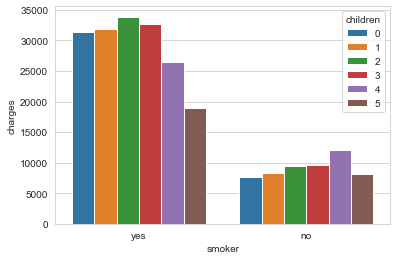

In [19]:
sns.barplot(x=df['smoker'], y=df['charges'], data=df, hue='children', ci=False)

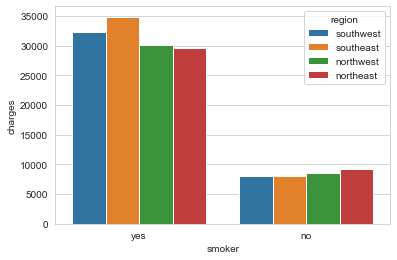

In [20]:
sns.barplot(x=df['smoker'], y=df['charges'], data=df, hue='region', ci=False)

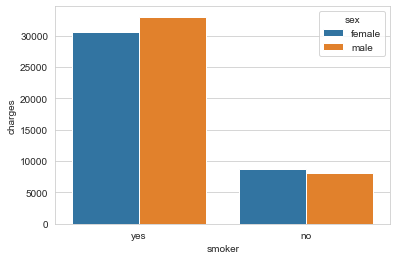

In [21]:
sns.barplot(x=df['smoker'], y=df['charges'], data=df, hue='sex', ci=False)

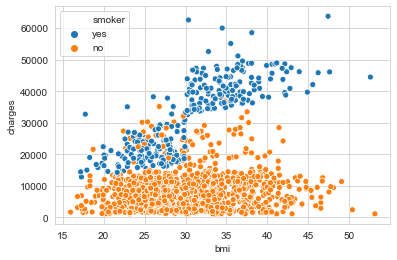

In [22]:
ax =sns.scatterplot(x = 'bmi' , y = 'charges', data = df, hue = 'smoker', sizes = (50, 200))

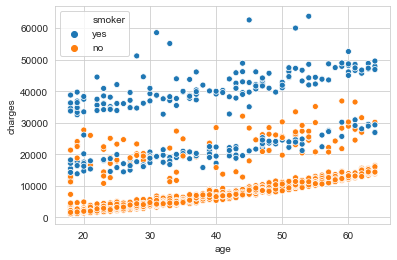

In [43]:
ax =sns.scatterplot(x = 'age' , y = 'charges', data = df, hue = 'smoker', sizes = (50, 200))

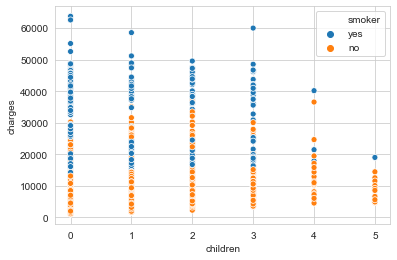

In [24]:
ax =sns.scatterplot(x = 'children' , y = 'charges', data = df, hue = 'smoker', sizes = (50, 200))

In [7]:
women_mask = df['sex']=='female'

In [8]:
df_women = df[women_mask]


In [9]:
#remove the women who smoke

In [10]:
mask_smoke =  df_women['smoker']=='no'

In [11]:
df_women

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [12]:
df_women.smoker.value_counts()

no     547
yes    115
Name: smoker, dtype: int64

In [13]:
non_smoker_women = df_women[mask_smoke]

In [14]:
non_smoker_women

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


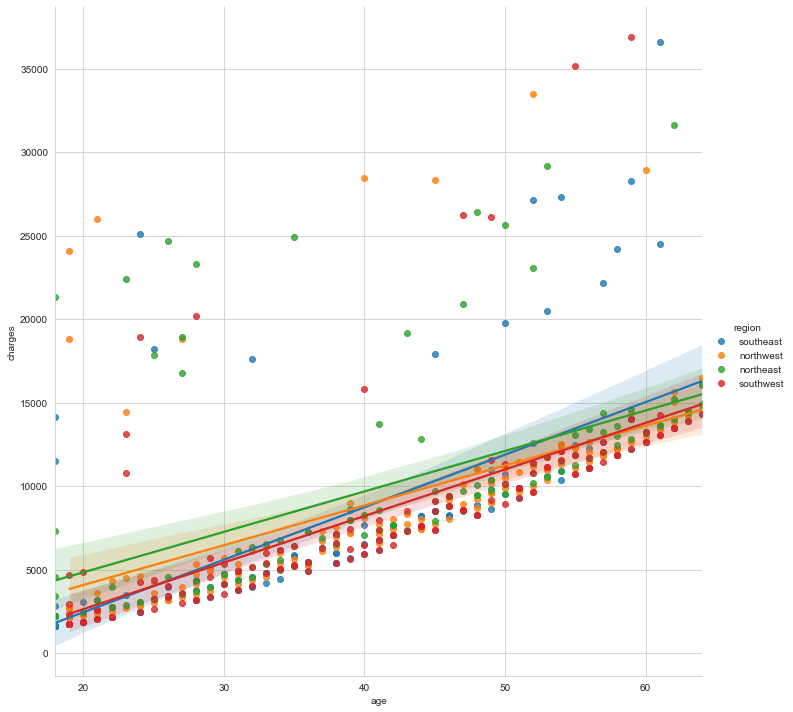

In [41]:
ax = sns.lmplot(x = "age", y = "charges", data = non_smoker_women, height = 10, aspect = 1, hue='region')

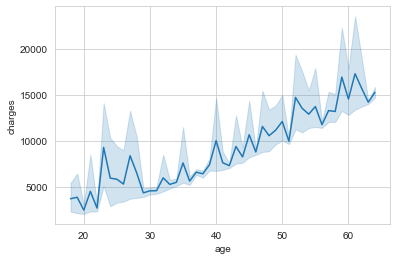

In [39]:
ax = sns.lineplot(x = 'age', y = 'charges', data = non_smoker_women)

In [25]:
corr_nsw = non_smoker_women[['age', 'bmi', 'children','charges']].corr()
corr_nsw

,age,bmi,children,charges
age,1.000000,0.089160,0.079141,0.621786
bmi,0.089160,1.000000,0.051120,0.075093
children,0.079141,0.051120,1.000000,0.176355
charges,0.621786,0.075093,0.176355,1.000000


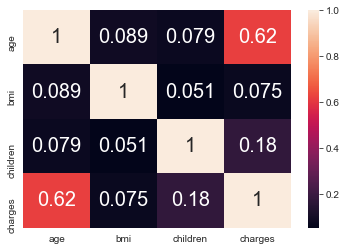

In [27]:
hm_nsw = sns.heatmap(corr_nsw, annot = True, annot_kws = {'size':'20'})

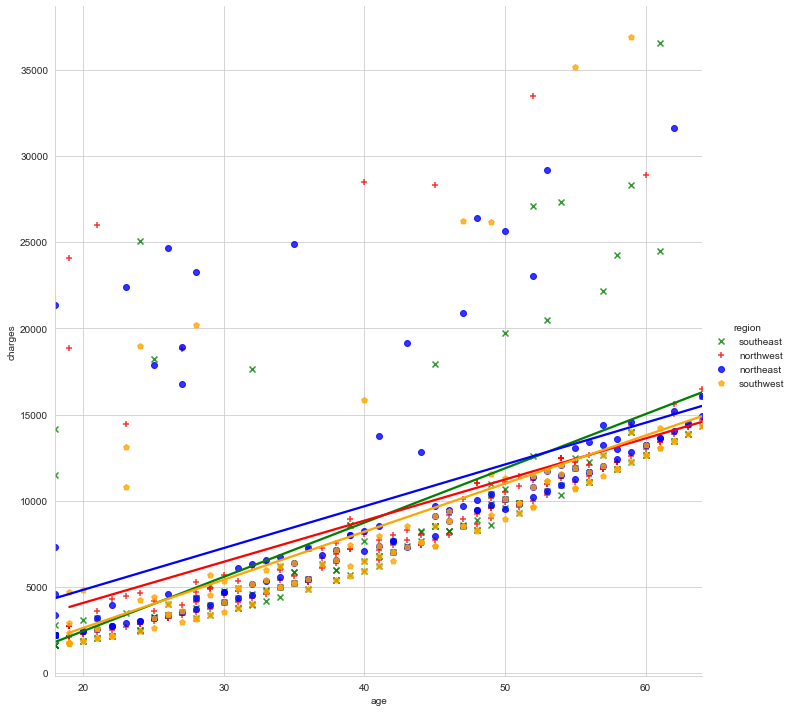

In [31]:
ax = sns.lmplot(x = "age", y = "charges", data = non_smoker_women, height = 10, hue = 'region', palette = ["green", "red", "blue", "orange"], markers = ["x", "+", "o", "p"], ci = False)

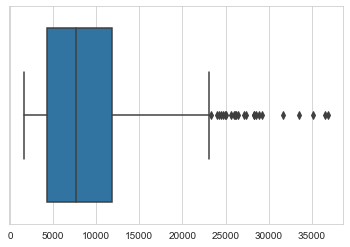

In [34]:
# determine the cut-off point for outlier charges for non-smoking women
sns.set_style('whitegrid')
x = non_smoker_women['charges'].values
ax = sns.boxplot(x)